# Advanced Machine Learning 
# Excercise 1 
## Authors:
- Mohammadhossein Jafari
- Kieran Didi
- Szymon Szmajdziński

## Data

In [1]:
import numpy as np
from numpy import array
from sklearn . datasets import load_digits
import random
import matplotlib.pyplot as plt

digits = load_digits ()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits ["target_names"]

full_data = np.column_stack((data, target))

mini_data = full_data[np.where((full_data[:,64] == 3) | (full_data[:,64] == 8))]
mini_features = mini_data[:, 0:64]

y = mini_data[:,64]
y = y.reshape(357,1)
y.shape

y[y == 3] = 1
y[y == 8] = -1

mini_features = mini_data[:, 0:64]
mini_features.shape
intercept = np.full(shape = 357, fill_value = 1, dtype = np.float64())

X = np.column_stack((intercept, mini_features))
beta_zero = np.zeros((X.shape[1], 1))

<div style="color: green; font-weight: bold">Comment</div>
The results of the solutions are the same. we stack the "featues matrix" with "target" column and then reduce the number of rows to the ones, whose target is 3 or 8, and then seperate them. we added the intercept at the begining of the featue matrix, in the worked example it is added at the end of the feature matrix, but it does not influnce the results. 

## Binary classification

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

accuracy_criteria = []
model_accuracies =  []

regularization = [0.00000001,0.0000001,0.000001, 0.00001, 0.0001,
                  0.001, 0.01, 0.1, 1, 10, 100,1000, 10000, 100000, 1000000, 1000000]

print("Lambda           Model Accuracy")
for candidate in regularization:
    LR = LogisticRegression(C = candidate , penalty = 'l2', solver= 'liblinear')
    accuracy = cross_val_score(LR, X, y = y.reshape(-1,), cv = 5)
    model_accuracies.append(np.mean(accuracy))
    print(candidate, "          ",model_accuracies[-1])

Lambda           Model Accuracy
1e-08            0.9352503912363067
1e-07            0.9352503912363067
1e-06            0.9352895148669796
1e-05            0.9493740219092333
0.0001            0.9522691705790297
0.001            0.9495305164319248
0.01            0.9580203442879499
0.1            0.9636541471048513
1            0.966431924882629
10            0.9636150234741784
100            0.9608372456964005
1000            0.9580203442879499
10000            0.9580203442879499
100000            0.9580203442879499
1000000            0.9580203442879499
1000000            0.9580203442879499


Choosing the best lambda. The best lambda according to accuracy is lambda = 1

<div style="color: green; font-weight: bold">Comment</div>
The methods for choosing the best Lambda is the same as worked example, and the results are the same.
we used more condidates for Lambda, and the calculated accuracy in our solution is more precise. we checked the code of worked solution and the code gives correct answers but the results shows in pdf are not correct. For example the accuracy for lambda= 1 is 0.96643, but in the pdf is has been written 
0.96619.

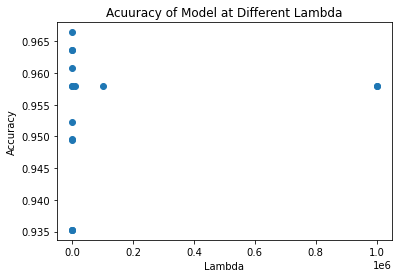

In [3]:
import matplotlib.pyplot as plt
plt.scatter(regularization, model_accuracies)
plt.title("Acuuracy of Model at Different Lambda")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.show()

## Help functions

In [4]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

lam = 1
def gradient(beta, X, y):
    N = y.shape[0]
    temp = (1 - sigmoid(y * np.dot(X, beta))) * (-y)
    return np.dot(X.T, temp) / N + beta / lam

def predict(beta, X):
    y = np.dot(X, beta)
    y[y > 0] = 1
    y[y < 0] = -1
    return y

def zero_one_loss(y_prediction, y_truth):
    return np.sum(y_prediction != y_truth) / len(y_prediction)


def plot_errors(tr_err, tst_err, iterations):
        fig, (ax1, ax2) = plt.subplots(2, 1)
        fig.suptitle('Train and test error')

        ax1.plot(np.log(range(1, iterations)), tr_err[1:iterations], 'o-')
        ax1.set_ylabel('Train error')

        ax2.plot(np.log(range(1, iterations)), tst_err[1:iterations], '.-')
        ax2.set_xlabel('Iterarion')
        ax2.set_ylabel('Test error')

        plt.show()
    
    

<div style="color: green; font-weight: bold">Comment</div>
sigmoid, gradiant, predict functions are similar to the worked example

## Optimization Methods

In [5]:
def gradient_descent(X, y, beta_0, tau_0 = None, gamma = None, mi = None, m = 10, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
        
    beta_new = beta_0 - tau_0 * gradient(beta_0, X, y)
    for t in range(1, m):
        tau = tau_0 / (1 + gamma * t)
        beta_new = beta_new - tau * gradient(beta_new, X, y)
        
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta_new, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta_new, plot_test))
    
    if graph:
        plot_errors(train_err, test_err, m)
        
    return beta_new


def stochastic_gradnient(X, y, beta_0, tau_0 = None, gamma = None, mi = None, m = 150, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
        
    N = X.shape[0]
    i = random.sample(range(N - 1), 1)
    beta_new = beta_0 - tau_0 * gradient(beta_0, X[i], y[i])
    for t in range(1, m):
        i = random.sample(range(N - 1), 1)
        tau = tau_0 / (1 + gamma * t)
        beta_new = beta_new - tau * gradient(beta_new, X[i], y[i])
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta_new, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta_new, plot_test))

    if graph:
        plot_errors(train_err, test_err, m)
        
    return beta_new
    
  
def minibatch_gradnient(X, y, beta_0, tau_0 = None, gamma = None, mi = None, m = 150, B = 20, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
        
    N = X.shape[0]
    i = random.sample(range(N - 1), B)
    B_test = np.random.choice(y.shape[0], size=B, replace=False)
    beta_new = beta_0 - tau_0 * gradient(beta_0, X[i], y[i])
    for t in range(m):
        i = random.sample(range(N - 1), B)
        tau = tau_0 / (1 + gamma * t)
        beta_new = beta_new - tau * gradient(beta_new, X[i], y[i])
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta_new, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta_new, plot_test))

    if graph:
        plot_errors(train_err, test_err, m)

    return beta_new


def momentum_gradnient(X, y, beta_0, tau_0 = None, gamma = None, mi = None, m = 150, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
    g_0 = np.zeros((X.shape[1], 1))
    N = X.shape[0]
    i = random.sample(range(N - 1), 1)
    g_new = mi * g_0 + (1 - mi) * gradient(beta_0, X[i], y[i])
    beta_new = beta_0 - tau_0 * g_new
    for t in range(m):
        i = random.sample(range(N - 1), 1)
        tau = tau_0 / (1 + gamma * t)
        g_new = mi * g_new + (1 - mi) * gradient(beta_new, X[i], y[i])
        beta_new = beta_new - tau * g_new
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta_new, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta_new, plot_test))
    if graph:
        plot_errors(train_err, test_err, m)
        
    return beta_new  


def adam(X, y, beta_0, m = 10, mi_1 = 0.9, mi_2 = 0.999, e = 1e-8, tau = 0.0001, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
    g_0 = np.zeros((X.shape[1], 1))
    q_0 = np.zeros((X.shape[1], 1))
    N = X.shape[0]
    i = random.sample(range(N - 1), 1)
    g_new = mi_1 * g_0 + (1 - mi_1) * gradient(beta_0, X[i], y[i])
    q_new = mi_2 * q_0 + (1 - mi_2) * (gradient(beta_0, X[i], y[i])) ** 2
    
    g_prim = g_new / (1 - mi_1)
    q_prim = q_new / (1 - mi_2)
    
    beta_new = beta_0 - g_prim * tau / (np.sqrt(q_prim) + e)
    
    for t in range(m):
        i = random.sample(range(N - 1), 1)
        
        g_new = mi_1 * g_new + (1 - mi_1) * gradient(beta_new, X[i], y[i])
        q_new = mi_2 * q_new + (1 - mi_2) * (gradient(beta_new, X[i], y[i])) ** 2
        
        g_prim = g_new / (1 - mi_1)
        q_prim = q_new / (1 - mi_2)
    
        beta_new = beta_new - g_prim * tau / (np.sqrt(q_prim) + e)
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta_new, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta_new, plot_test))
    if graph:
        plot_errors(train_err, test_err, m)
        
    return beta_new 


def stochastic_average_gradient(X, y, beta, tau_0, gamma, mi = None, m = 150, eps = 0.000001, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
    N = X.shape[0]
    D = X.shape[1]
    g_stored = - y * X * sigmoid(- y * (np.dot(X, beta)))
    g = np.sum(g_stored, axis = 0).reshape(D, 1) / N
    for t in range(m):
        i = random.sample(range(N - 1), 1)
        tau = tau_0 / (1 + gamma * t)
        g_temp = - y[i] * X[i] * sigmoid(- y[i] * np.dot(X[i], beta))
        g = g + (g_temp - g_stored[i]).T / N
        g_stored[i] = g_temp 
        beta = beta * (1 - tau /lam) - tau * g
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta, plot_test))
    if graph:
        plot_errors(train_err, test_err, m)

    return beta


def dual_coordinate_ascent(X, y, beta_0 = None, tau = None, gamma = None, mi = None, m = 10, eps = 0.000001, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
    N = X.shape[0]
    alpha = np.random.rand(N)
    alpha = alpha.reshape(-1,1)
    temp = y * alpha
    beta = np.dot(X.T, temp) * lam / N
    for t in range(m):
        i = random.sample(range(N - 1), 1)
        f_prim = y[i] * np.dot(X[i], beta) + np.log(alpha[i]/(1 - alpha[i]))
        f_bis = np.dot(X[i], X[i].T) * lam / N + 1 / (alpha[i] * (1 - alpha[i]))
        alpha_old = alpha[i]
        alpha[i] = np.clip(alpha[i] - f_prim / f_bis, eps, 1 - eps)
        beta = beta + lam * y[i] * X[i].T * (alpha[i] - alpha_old)
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta, plot_test))
    if graph:
        plot_errors(train_err, test_err, m)
        
    return beta 


def newton_raphson(X, y, beta, tau = None, gamma = None, mi = None, m = 10, graph = False):
    if graph:
        train_err = [0] * m
        test_err = [0] * m
    N = X.shape[0]
    D = X.shape[1]
    for t in range(m):
        scores = np.dot(X, beta)
        labels = y / sigmoid(y * scores)
        temp = (sigmoid(scores) * sigmoid(- scores)).reshape(-1)
        W = np.diag(temp) * lam / N  
        beta = np.linalg.inv(np.identity(D) + X.T @ W @ X) @ X.T @ W @ (scores + labels)
        if graph:
            train_err[t] = zero_one_loss(y_plot_train, predict(beta, plot_train))
            test_err[t] = zero_one_loss(y_plot_test, predict(beta, plot_test))
    if graph:
        plot_errors(train_err, test_err, m)
    return beta 

    

## Learning parameters 

In [6]:
from sklearn import model_selection

# train and test set 
X, X_test, y, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

tau_space = [0.001, 0.01, 0.1]
mi_space = [0.1, 0.2, 0.5]
gamma_space = [0.0001, 0.001, 0.01]


def find_parameters(method, X, y, taus = tau_space, mis = mi_space, gammas = gamma_space):
    good_params = []
    min_err = 10000
    for tau in taus:
        for mi in mi_space:
            for gamma in gamma_space:
                cum_err = 0
                kf = model_selection.KFold(n_splits = 10) 
                for train_index , validation_index in kf.split(X):
                    X_train , X_validation = X[train_index], X[validation_index] 
                    y_train , y_validation = y[train_index], y[validation_index]
                    
                    beta = method(X_train, y_train, beta_zero, tau_0 = tau, gamma = gamma, mi = mi)
                    cum_err += zero_one_loss(y_validation, predict(beta, X_validation))

                if cum_err < min_err:
                    min_err = cum_err
                    good_params = [tau, gamma, mi]
    return good_params

methods = [gradient_descent, stochastic_gradnient, minibatch_gradnient, momentum_gradnient, stochastic_average_gradient]

#### Learning parameters 
print("Method                 tau     gamma      mi")
for method in methods:
    optimal_params = find_parameters(method, X, y)
    print(method.__name__,";     ",  optimal_params)




Method                 tau     gamma      mi
gradient_descent ;      [0.01, 0.0001, 0.1]
stochastic_gradnient ;      [0.001, 0.01, 0.2]
minibatch_gradnient ;      [0.01, 0.01, 0.5]
momentum_gradnient ;      [0.001, 0.0001, 0.5]
stochastic_average_gradient ;      [0.1, 0.001, 0.2]


<div style="color: green; font-weight: bold">Comment</div>
The parameters of the gradiant_descent are exactly the same as worked example. And the difference between the results of the other Algorithm with the worked example seems to be because of randomness.

## Speed comparison

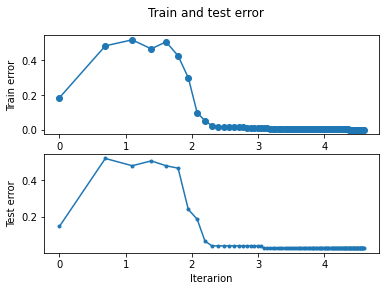

In [7]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = gradient_descent(plot_train, y_plot_train, beta_zero,
                             m = 100, tau_0 = 0.01, gamma = 0.001,
                             mi = 0.1, graph = True)


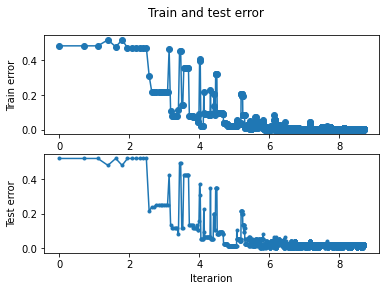

In [8]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = stochastic_gradnient(plot_train, y_plot_train, beta_zero,
                                m = 6000, tau_0 = 0.01, gamma = 0.01,
                                mi = 0.5, graph = True)

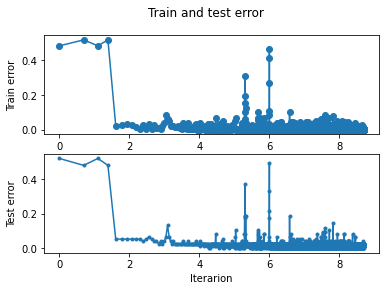

In [9]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = minibatch_gradnient(plot_train, y_plot_train, beta_zero,
                                m = 6000, tau_0 = 0.01, gamma = 0.0001,
                                mi = 0.5, graph = True)


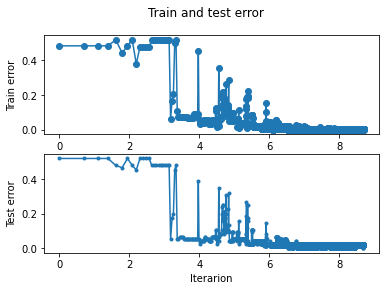

In [10]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = momentum_gradnient(plot_train, y_plot_train, beta_zero,
                                m = 6000, tau_0 = 0.01, gamma = 0.01,
                                mi = 0.2, graph = True)


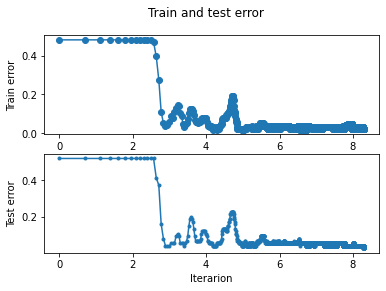

In [11]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = adam(plot_train, y_plot_train, beta_zero, graph = True, m = 4000)

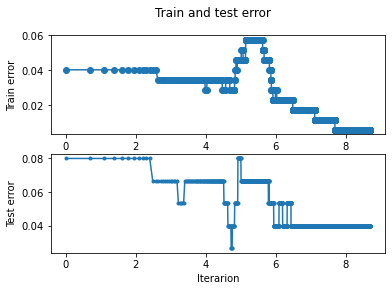

In [12]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = stochastic_average_gradient(plot_train, y_plot_train, beta_zero, tau_0 = 0.001, gamma = 0.01,
                                        graph = True, m = 6000)

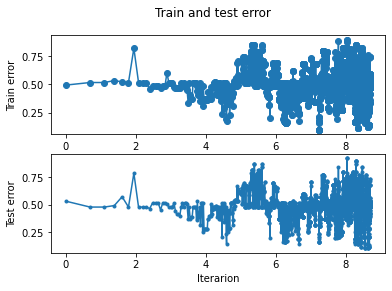

In [13]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = dual_coordinate_ascent(plot_train, y_plot_train, beta_zero, gamma = 0.01,
                                        graph = True, m = 6000)

<ipython-input-4-2924c352eb2f>:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-z))
<ipython-input-5-567c4b6afdc8>:181: RuntimeWarning: divide by zero encountered in true_divide
  labels = y / sigmoid(y * scores)
<ipython-input-5-567c4b6afdc8>:184: RuntimeWarning: invalid value encountered in matmul
  beta = np.linalg.inv(np.identity(D) + X.T @ W @ X) @ X.T @ W @ (scores + labels)


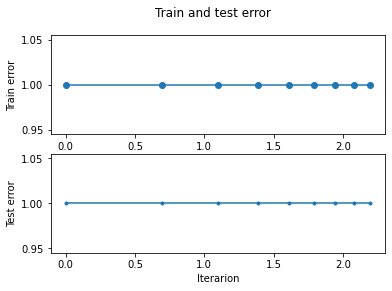

In [14]:
plot_train, plot_test, y_plot_train, y_plot_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
beta_plot = newton_raphson(plot_train, y_plot_train, np.ones((X.shape[1], 1)), graph = True, m = 10)

<div style="color: green; font-weight: bold">Comment</div>
we chose "the natuarl logarithm of the number of Iterations" of each algorithm as the x-axis of the diagrams, which was a wrong approach. We had to multiply the number of iterarions with "the complexity per iteration of each Algorithm".  Therefore, we were not able to compare between different Algorithms. 